In [ ]:
import requests
from bs4 import BeautifulSoup

# URL 설정
url = 'https://news.daum.net/economy'

# 요청 보내기
response = requests.get(url)
response.encoding = 'utf-8'

# 응답 확인
print(url)
print(type(response))
print(response.status_code)

# BeautifulSoup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser')

# 뉴스 기사 링크와 제목 추출
news_list = soup.select('ul.list_newsheadline2 li')
print(type(news_list), len(news_list))

for li_tag in news_list:
    a_tag = li_tag.find('a')
    link = a_tag['href']
    
    strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
    if strong_tag:
        title = strong_tag.text.strip()
        print(link)
        print(title)
    else:
        print(f"제목을 찾을 수 없습니다: {link}")

https://news.daum.net/economy
<class 'requests.models.Response'>
200
<class 'bs4.element.ResultSet'> 9
https://v.daum.net/v/20250408210600644
“경영 노하우 공유하는 특별한 경험”…매일경제-성남상의, 제7기 최고경영자과정 입학식
https://v.daum.net/v/20250408205853462
가성비로 무장한 단체, 다시 제주로 간다” 수학여행부터 대만 인센티브까지.. ‘단체관광’이 살리는 제주
https://v.daum.net/v/20250408204335126
부동산 경기 활성화와 가계 부채 억제 사이, 새 정부 선택은?[정준호의 부동산과 사회경제]
https://v.daum.net/v/20250408184905360
‘관세 직격탄’ 애플 주가 19% ‘뚝’… 갈수록 커지는 ‘T공포’ [관세전쟁 후폭풍]
https://v.daum.net/v/20250408183514025
미·중 치킨게임…원화값 1473원대 추락, 글로벌 금융위기 후 최저
https://v.daum.net/v/20250408175343664
美·中 관세 폭탄 돌리기…‘새우등’ 한국 경제 불안감 더 커졌다
https://v.daum.net/v/20250408175111585
나랏빚 1175조 '역대 최대'…추경 재원 바닥
https://v.daum.net/v/20250408174344325
메디젠휴먼케어, "23andMe 파산..한국 유전체 산업의 위기 아닌 기회"
https://v.daum.net/v/20250408173713085
칩 확보서 데이터센터까지···전 산업에 'AI 고속도로' 깔아야


In [18]:
import requests
from bs4 import BeautifulSoup

# 섹션 딕셔너리
section_dict = {
    '기후/환경': 'climate',
    '사회': 'society',
    '경제': 'economy',
    '정치': 'politics',
    '국제': 'world',
    '문화': 'culture',
    '생활': 'life',
    'IT/과학': 'tech',
    '인물': 'people'
}

# 함수 선언
def print_news(section_name):
    section = section_dict.get(section_name)
    if not section:
        print(f"섹션 '{section_name}'을(를) 찾을 수 없습니다.")
        return
    
    url = f'https://news.daum.net/{section}'
    response = requests.get(url)
    response.encoding = 'utf-8'
    
    print(f"======> {url} {section_name} 뉴스 <======")
    
    soup = BeautifulSoup(response.text, 'html.parser')
    news_list = soup.select('ul.list_newsheadline2 li')
    
    for li_tag in news_list[:5]:
        a_tag = li_tag.find('a')
        link = a_tag['href']
        
        strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
        title = strong_tag.text.strip()
        
        print(link)
        print(title)

# 함수 호출
print_news('경제')
print_news('사회')

======> https://news.daum.net/economy 경제 뉴스 <======
https://v.daum.net/v/20250409000111726
"다양화·세분화에 대응"…AI 플랫폼 활용하는 패션·뷰티업계
https://v.daum.net/v/20250408210600644
“경영 노하우 공유하는 특별한 경험”…매일경제-성남상의, 제7기 최고경영자과정 입학식
https://v.daum.net/v/20250408205853462
가성비로 무장한 단체, 다시 제주로 간다” 수학여행부터 대만 인센티브까지.. ‘단체관광’이 살리는 제주
https://v.daum.net/v/20250408204335126
부동산 경기 활성화와 가계 부채 억제 사이, 새 정부 선택은?[정준호의 부동산과 사회경제]
https://v.daum.net/v/20250408184905360
‘관세 직격탄’ 애플 주가 19% ‘뚝’… 갈수록 커지는 ‘T공포’ [관세전쟁 후폭풍]
======> https://news.daum.net/society 사회 뉴스 <======
https://v.daum.net/v/20250409011454625
중국 10대 소년까지 공군기지 촬영 “아버지가 공안”
https://v.daum.net/v/20250409010106513
5년새 환자 40% 이상 늘었다…'쇼그렌증후군' 아시나요?
https://v.daum.net/v/20250409001456063
정말 행복했다…연경이도, 우리도
https://v.daum.net/v/20250409000542856
[부동산 Knock] 도 가계대출 절반 주담대…경기부진 속 소비위축 ‘부메랑’
https://v.daum.net/v/20250409000539852
[강원의료 희망을 캐다] “지방, 분초 다투는 응급환자 많아… 거점병원 반드시 필요”


In [1]:
import requests as req
from bs4 import BeautifulSoup

section_dict = {
    '기후/환경':'climate',
    '경제': 'economy',
    '사회':'society',
    "정치":'politics',
    '국제':'world',
    '문화':'culture'
    
}

def print_news(sid):
    #section = section_dict[sid]
    section = section_dict.get(sid)
    if section is None:
        print("요청하신 키값을 찾을 수 없습니다.")
    else:


        url = f"https://news.daum.net/{sid}"
        print(url)

        req_header = {
            'user-agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        res = req.get(url, headers=req_header)
        print(res)
        print(type(res))
        print(res.status_code, res.ok)
        res.encoding = 'utf-8'

        if res.ok:
            html = res.text

            soup = BeautifulSoup(html, 'html.parser')
            
            li_list = soup.select("ul.list_newsheadline2 li")
            print(type(li_list)) # [<a href="http://">뉴스제목</a>]ResultSet객체, <a></a>: Tag 객체 
            #[<li></li>, ]
            for li in li_list:
                #print(type(a_tag))
                a_tag = li.find('a')
                #select_one이 동작되지 않을 때때
                # title = li.select("div.cont_thumb strong.tit_txt")
                # if title:
                #     titl = title[0]
                title = li.select_one("div.cont_thumb strong.tit_txt")
                title = title.text
                #href 속성의 값을 가져오기
                link = a_tag['href']
                print(link, title)


            # <a> 태그 리스트 순회하기  `  
        else: 
            # 응답(response)이 Error 이면 status code 출력 
            print(f'Error code = {res.status_code}')   

print(print_news('경제'))

https://news.daum.net/경제
<Response [200]>
<class 'requests.models.Response'>
200 True
<class 'bs4.element.ResultSet'>
https://v.daum.net/v/20250409083816698 '균형발전의 새 화두' 세종 수도 이전 논쟁 불붙었다
https://v.daum.net/v/20250409071324960 [단독] 이준석, ‘연금개혁 리셋’ ‘여가부 개편’ 담은 대선공약 내주 발표
https://v.daum.net/v/20250409063102233 '전세 10년 보장' 현실화되면…"그야말로 대혼란" 경고한 까닭 [돈앤톡]
https://v.daum.net/v/20250409063016219 ‘친명 좌장’ 정성호 “개헌 동시투표? 국힘 전략 말려드는 것” [황형준의 법정모독]
https://v.daum.net/v/20250409060136880 “정치가 뒷받침돼야 경제 산다…협치 담보할 개헌 필요”
https://v.daum.net/v/20250409094730569 3월 취업자 19.3만 늘었지만…청년·건설·제조업 '고용한파' 지속(종합)
https://v.daum.net/v/20250409094131319 오늘부터 국가별 상호 관세…보복하던 중국엔 “104% 부과”
https://v.daum.net/v/20250409092645657 '한화 3세' 김동원 실패작 캐롯, 결국 한화손보 품으로… 경영능력 입증 무산
https://v.daum.net/v/20250409090004377 줄탄핵·불법계엄 부딪치면 누가 막나… '87년 체제' 청산, 지금이 골든타임 [탄핵 갈등 넘어 통합으로]
https://v.daum.net/v/20250409084028761 건설업 취업자 '역대 최대폭' 감소…청년 고용률 4년만에 최저(상보)
https://v.daum.net/v/20250409081126003 美재무장관 "몇몇 국가의 경우 매우 빠르게 관세협정 체결"(종합)
http

In [36]:
import requests as req
from bs4 import BeautifulSoup

section_dict = {
    '기후/환경':'climate',
    '경제': 'economy',
    '사회':'society',
    "정치":'politics',
    '국제':'world',
    '문화':'culture'
    
}

def print_news(sid):
    section = section_dict[sid]

    url = f"https://news.daum.net/{section}"
    print(f'=====>{url} {sid}뉴스<=====')

    req_header = {
        'user-agent':
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
    }

    
    res = req.get(url, headers=req_header)
    # print(res)
    # print(type(res))
    # print(res.status_code, res.ok)
    res.encoding = 'utf-8'

    if res.ok:
        html = res.text

        soup = BeautifulSoup(html, 'html.parser')
        
        li_list = soup.select("ul.list_newsheadline2 li")
        #print(type(li_list)) # [<a href="http://">뉴스제목</a>]ResultSet객체, <a></a>: Tag 객체 
        for li in li_list[:5]:
            #print(type(a_tag))
            a_tag = li.find('a')
            title = li.select_one("div.cont_thumb strong.tit_txt")
            title = title.text
            #href 속성의 값을 가져오기
            link = a_tag['href']
            print(link, title)


        # <a> 태그 리스트 순회하기  `  
    else: 
        # 응답(response)이 Error 이면 status code 출력 
        print(f'Error code = {res.status_code}')   

print(print_news('경제'))
print(print_news('국제'))

=====>https://news.daum.net/economy 경제뉴스<=====
https://v.daum.net/v/20250409000111726 "다양화·세분화에 대응"…AI 플랫폼 활용하는 패션·뷰티업계
https://v.daum.net/v/20250408210600644 “경영 노하우 공유하는 특별한 경험”…매일경제-성남상의, 제7기 최고경영자과정 입학식
https://v.daum.net/v/20250408205853462 가성비로 무장한 단체, 다시 제주로 간다” 수학여행부터 대만 인센티브까지.. ‘단체관광’이 살리는 제주
https://v.daum.net/v/20250408204335126 부동산 경기 활성화와 가계 부채 억제 사이, 새 정부 선택은?[정준호의 부동산과 사회경제]
https://v.daum.net/v/20250408184905360 ‘관세 직격탄’ 애플 주가 19% ‘뚝’… 갈수록 커지는 ‘T공포’ [관세전쟁 후폭풍]
None
=====>https://news.daum.net/world 국제뉴스<=====
https://v.daum.net/v/20250409015524790 러 하원, 러·이란 포괄적 전략적 동반자 조약 비준
https://v.daum.net/v/20250409012823706 '트럼프 관세 부메랑' 멕시코 진출 美자동차 업체 1분기 수출↓
https://v.daum.net/v/20250409010910558 아베의 ‘절친 전략’ 지켜본 이시바, 美와 가장 먼저 협상팀 만들었다
https://v.daum.net/v/20250409005252443 中 ‘트럼프 1기’ 학습 효과… 2일 이내 반격, 신속하게 대응
https://v.daum.net/v/20250409003910280 [송세영 특파원의 여기는 베이징] 中 ‘포위·봉쇄 작전’ 숨통 죄면 대만 일주일도 버티기 힘들다
None


In [2]:
link = '//thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/cb/2025/04/09/202504090737595375_0.jpg'
print(link)

//thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/cb/2025/04/09/202504090737595375_0.jpg


=====>https://news.nate.com/section?mid=n0300 경제뉴스<=====
<Response [200]>
<class 'requests.models.Response'>
200 True
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mk/2025/04/09/20250410_01160101000001_L00.jpg


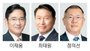

https://news.nate.com/view/20250409n34756?mid=n0300
억만장자 비밀모임에 韓 3대그룹 총수 초청
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mt/2025/04/09/mt_1744181766572_816806_0.jpg


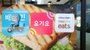

https://news.nate.com/view/20250409n28495?mid=n0300
"지난달에도 네번 시켰네"…한국인들, 매달 10만원 '여기'에 쓴다
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yt/2025/04/09/PYH2025040902530001300_P2.jpg


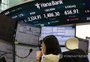

https://news.nate.com/view/20250409n28823?mid=n0300
1,500원대 환율 '뉴노멀' 되나…관세전쟁 충격에 "천장 열렸다"(종합)
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mt/2025/04/09/2025040915363155055_1.jpg


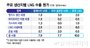

https://news.nate.com/view/20250409n28527?mid=n0300
알래스카 가스개발, 경제성 있다?…LNG·조선 협상 카드 구체화하나
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7226668_high.jpg


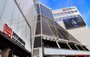

https://news.nate.com/view/20250409n27696?mid=n0300
"7년째 적자" 현대免, 근속 만 3년 이상 직원 희망퇴직 단행
None


In [20]:
import requests as req
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display


section_dict = {
    'IT/과학':'section?mid=n0600',
    '경제': 'section?mid=n0300',
    '사회':'section?mid=n0400',
    "정치":'section?mid=n0200',
    '세계':'section?mid=n0500',
    '최신뉴스':'recent?mid=n0100'
    
}

def print_news(section):
    sid = section_dict[section]

    url = f"https://news.nate.com/{sid}"
    print(f'=====>{url} {section}뉴스<=====')

    req_header = {
        'user-agent':
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
    }

    
    res = req.get(url, headers=req_header)
    print(res)
    print(type(res))
    print(res.status_code, res.ok)
    res.encoding = 'euc-kr'

    if res.ok:
        html = res.text

        soup = BeautifulSoup(html, 'html.parser')
        
        a_tag_list = soup.select("div.mlt01 a[href *= 'news.nate.com/view']")
        # print(type(a_list)) # [<a href="http://">뉴스제목</a>]ResultSet객체, <a></a>: Tag 객체 
        for a_tag in a_tag_list[:5]:

            img_tag =  a_tag.select_one("span.ib img[src*='.jpg']")
            if img_tag:
                img_url = urljoin(url, img_tag['src'])
                print(img_url)
                display(Image(img_url))
            else:
                img_url = None
                print(f"이미지 없음 or 에러. 상태코드 = {res.status_code}")




            # print(type(a_tag))
            title = a_tag.select_one("span.tb h2.tit")
            title = title.text
            #href 속성의 값을 가져오기
            link = 'https:' + a_tag['href']
            print(link)
            print(title)


        # <a> 태그 리스트 순회하기  `  
    else: 
        # 응답(response)이 Error 이면 status code 출력 
        print(f'Error code = {res.status_code}')   

print(print_news('경제'))
